# Filtering the dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("C:/Users/noahk/Downloads/schoon.csv")
df.sample(10)
unique_carriers = df['AIRLINE'].nunique()

print(f'Aantal unieke carriers in de dataset: {unique_carriers}')


Aantal unieke carriers in de dataset: 18


In [10]:
df_vertraagd = df[df['ARR_DELAY'] > 60]
df_vertraagd.sample(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Month,DayOfWeek,DELAY_CATEGORY,DISTANCE_CATEGORY
2590983,2023-08-21,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1232,BWI,"Baltimore, MD",CLT,"Charlotte, NC",1716,1926.0,130.0,20.0,1946.0,2041.0,12.0,1846,2053.0,127.0,0.0,NaN,0.0,90.0,87.0,55.0,361.0,0.0,0.0,0.0,0.0,127.0,8,0,Meer dan 60 minuten,0-1000
2482048,2019-07-16,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,536,STL,"St. Louis, MO",DCA,"Washington, DC",915,1101.0,106.0,8.0,1109.0,1343.0,11.0,1215,1354.0,99.0,0.0,NaN,0.0,120.0,113.0,94.0,719.0,18.0,0.0,0.0,0.0,81.0,7,1,Meer dan 60 minuten,0-1000
2522847,2021-10-24,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1057,IAH,"Houston, TX",ORD,"Chicago, IL",2005,2238.0,153.0,17.0,2255.0,100.0,7.0,2240,107.0,147.0,0.0,NaN,0.0,155.0,149.0,125.0,925.0,11.0,0.0,0.0,0.0,136.0,10,6,Meer dan 60 minuten,0-1000
1290156,2021-04-01,Republic Airline,Republic Airline: YX,YX,20452,5798,LGA,"New York, NY",BOS,"Boston, MA",1959,2131.0,92.0,17.0,2148.0,2225.0,7.0,2122,2232.0,70.0,0.0,NaN,0.0,83.0,61.0,37.0,184.0,70.0,0.0,0.0,0.0,0.0,4,3,Meer dan 60 minuten,0-1000
467525,2021-06-26,Republic Airline,Republic Airline: YX,YX,20452,5786,DTW,"Detroit, MI",ORD,"Chicago, IL",845,1624.0,459.0,14.0,1638.0,1630.0,8.0,912,1638.0,446.0,0.0,NaN,0.0,87.0,74.0,52.0,235.0,52.0,0.0,394.0,0.0,0.0,6,5,Meer dan 60 minuten,0-1000
1848370,2019-10-18,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,155,DSM,"Des Moines, IA",DEN,"Denver, CO",1826,2145.0,199.0,13.0,2158.0,2229.0,10.0,1925,2239.0,194.0,0.0,NaN,0.0,119.0,114.0,91.0,589.0,0.0,0.0,0.0,0.0,194.0,10,4,Meer dan 60 minuten,0-1000
109211,2019-08-20,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2147,LAX,"Los Angeles, CA",HOU,"Houston, TX",1950,2210.0,140.0,13.0,2223.0,310.0,6.0,55,316.0,141.0,0.0,NaN,0.0,185.0,186.0,167.0,1390.0,18.0,0.0,1.0,0.0,122.0,8,1,Meer dan 60 minuten,1000-2000
272071,2020-08-29,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5398,ORF,"Norfolk, VA",PHL,"Philadelphia, PA",1645,1820.0,95.0,8.0,1828.0,1909.0,8.0,1748,1917.0,89.0,0.0,NaN,0.0,63.0,57.0,41.0,212.0,89.0,0.0,0.0,0.0,0.0,8,5,Meer dan 60 minuten,0-1000
986696,2023-07-16,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,390,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1642,1900.0,138.0,86.0,2026.0,2151.0,11.0,1831,2202.0,211.0,0.0,NaN,0.0,169.0,242.0,145.0,985.0,0.0,138.0,73.0,0.0,0.0,7,6,Meer dan 60 minuten,0-1000
2003800,2022-01-27,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,535,DEN,"Denver, CO",PSP,"Palm Springs, CA",1115,1204.0,49.0,70.0,1314.0,1359.0,4.0,1237,1403.0,86.0,0.0,NaN,0.0,142.0,179.0,105.0,776.0,25.0,0.0,37.0,0.0,24.0,1,3,Meer dan 60 minuten,0-1000


From the talk with Hans, I filtered the dataset on delays above 60 minutes

# Delays above 60 minutes per month

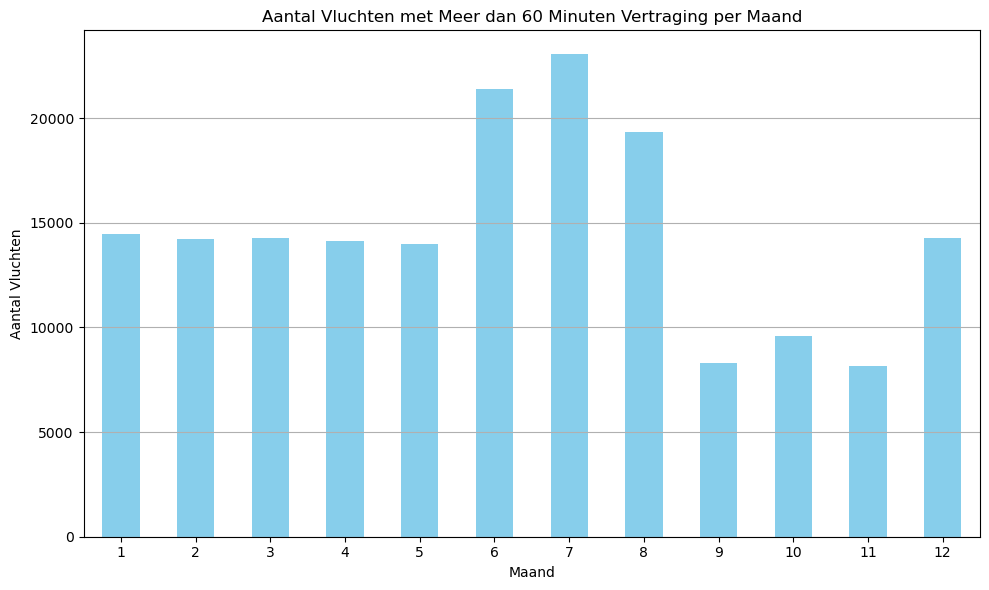

In [11]:
maand_vertragingen = df_vertraagd.groupby('Month').size()


plt.figure(figsize=(10, 6))
maand_vertragingen.plot(kind='bar', color='skyblue')
plt.title('Aantal Vluchten met Meer dan 60 Minuten Vertraging per Maand')
plt.xlabel('Maand')
plt.ylabel('Aantal Vluchten')
plt.xticks(rotation=0)  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

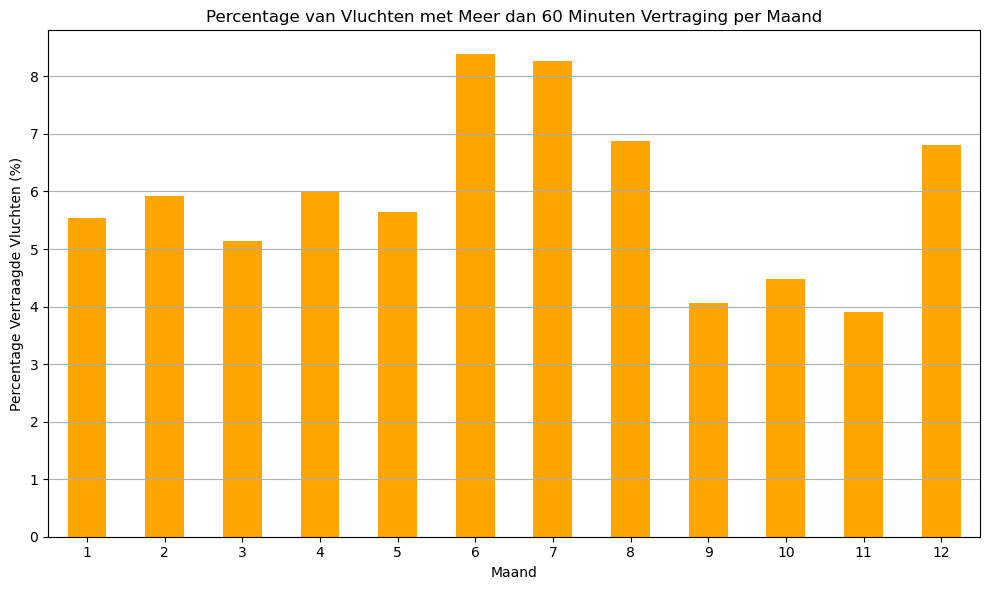

In [12]:
totaal_per_maand = df.groupby('Month').size()


vertraging_per_maand = df_vertraagd.groupby('Month').size()


percentage_vertraagd_per_maand = (vertraging_per_maand / totaal_per_maand) * 100


plt.figure(figsize=(10, 6))
percentage_vertraagd_per_maand.plot(kind='bar', color='orange')
plt.title('Percentage van Vluchten met Meer dan 60 Minuten Vertraging per Maand')
plt.xlabel('Maand')
plt.ylabel('Percentage Vertraagde Vluchten (%)')
plt.xticks(rotation=0)  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

From these graphs there are some conclusions that can be made. The first graph shows that there are significantly more flights delayed above 60 minutes during june, july and august (peak season). But during those months, there are simply more flights. That is why I made the second graph. This shows the percentage delayed flights. This graph shows that during peak season, but also during december a higher percentage of flights are delayed. I came to know that the feature month could be valuable to my machine teaching

# Day of the Week analysis

The purpose of next graph is to find out whether or not the day of the week has a significant impact on the target

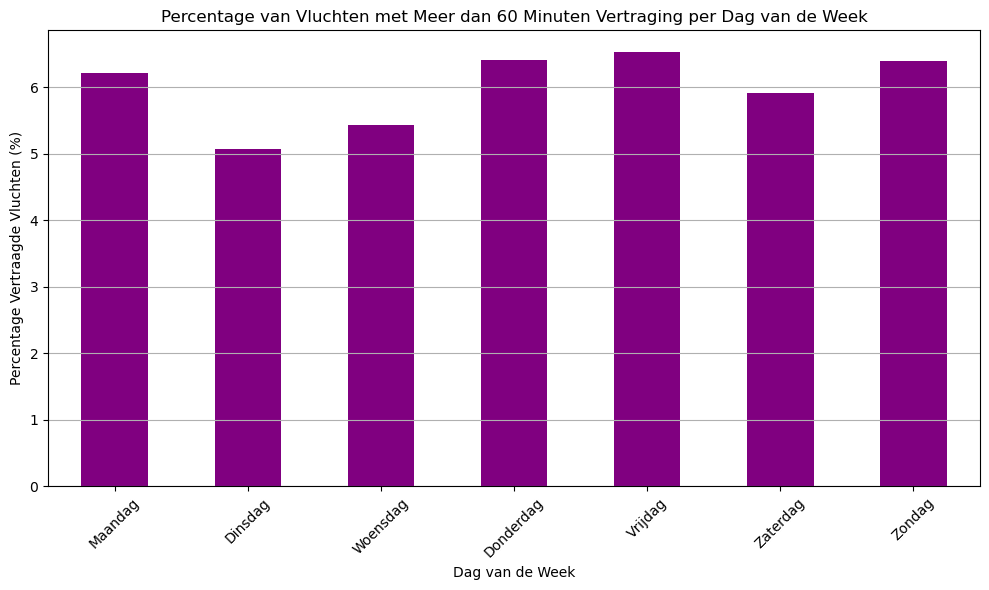

In [13]:
totaal_per_dag = df.groupby('DayOfWeek').size()


vertraging_per_dag = df_vertraagd.groupby('DayOfWeek').size()


percentage_vertraagd_per_dag = (vertraging_per_dag / totaal_per_dag) * 100


dagen_labels = ['Maandag', 'Dinsdag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag']

plt.figure(figsize=(10, 6))
percentage_vertraagd_per_dag.plot(kind='bar', color='purple')
plt.title('Percentage van Vluchten met Meer dan 60 Minuten Vertraging per Dag van de Week')
plt.xlabel('Dag van de Week')
plt.ylabel('Percentage Vertraagde Vluchten (%)')
plt.xticks(ticks=range(7), labels=dagen_labels, rotation=45)  
plt.grid(axis='y')

plt.tight_layout()
plt.show()

This graph tells me that there are no big differences between the percentages of arrival delays among all days. To prvent the model from overfitting, I am probably not going to use this feature in my model.

# Delay overview

I talked to Hans and he said that a valuable addition to the EDA is a timeline which shows the percentages of delay above 60 minutes per day. 

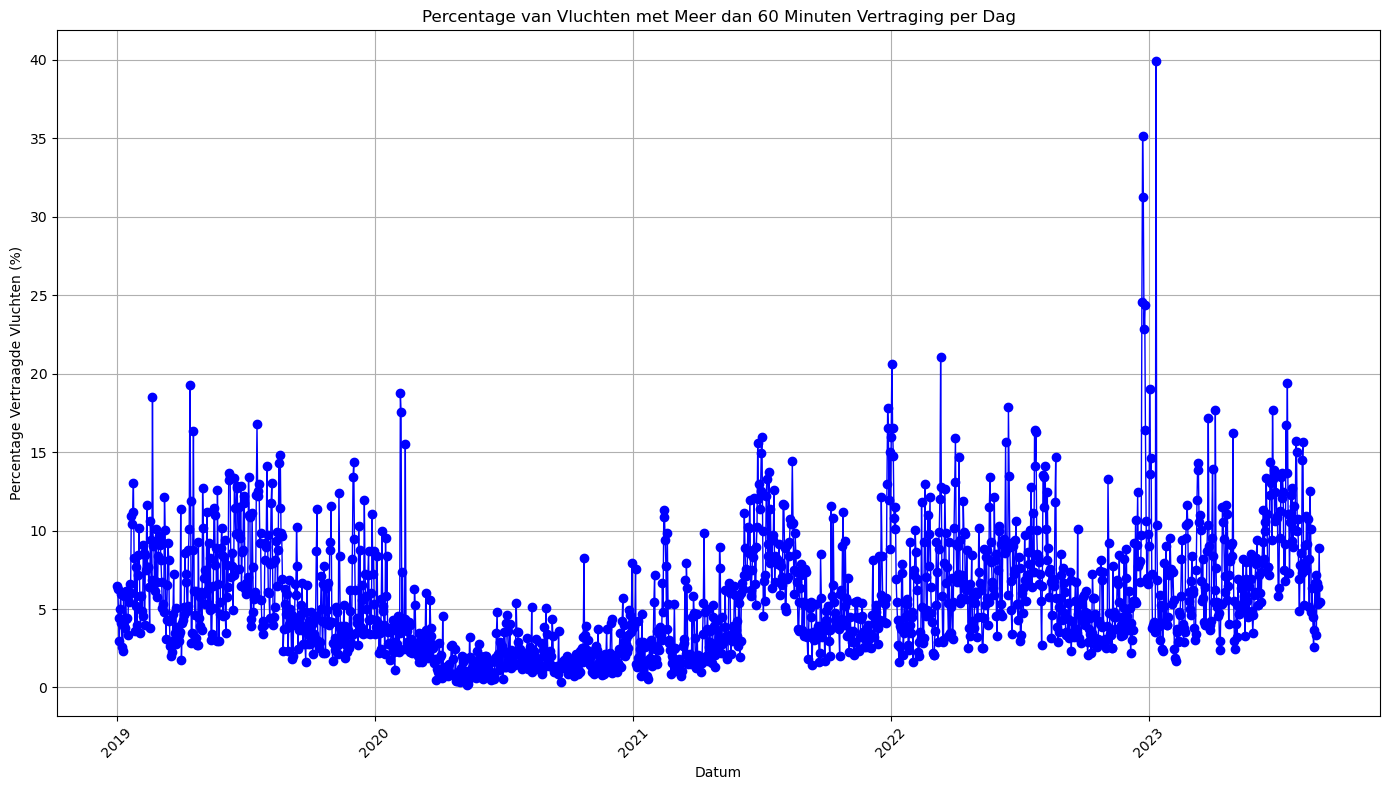

In [14]:



df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])


totaal_per_dag = df.groupby('FL_DATE').size()


vertraging_per_dag = df[df['ARR_DELAY'] > 60].groupby('FL_DATE').size()


percentage_vertraagd_per_dag = (vertraging_per_dag / totaal_per_dag) * 100

percentage_vertraagd_per_dag = percentage_vertraagd_per_dag.fillna(0)


plt.figure(figsize=(14, 8))
plt.plot(percentage_vertraagd_per_dag.index, percentage_vertraagd_per_dag, marker='o', color='blue', linewidth=1)


plt.title('Percentage van Vluchten met Meer dan 60 Minuten Vertraging per Dag')
plt.xlabel('Datum')
plt.ylabel('Percentage Vertraagde Vluchten (%)')
plt.xticks(rotation=45)  
plt.grid()

plt.tight_layout()
plt.show()


This graph indeed shows that during summer and winter time, there are way more days with higher delay percentages. For every year, you can see this

# Dates with the most delays

To find out why some days had so many delays, I'm going to make a graph which shows the dates with the most delays. Then, I'm going to do research why those days had so many delays.

<Figure size 1400x800 with 0 Axes>

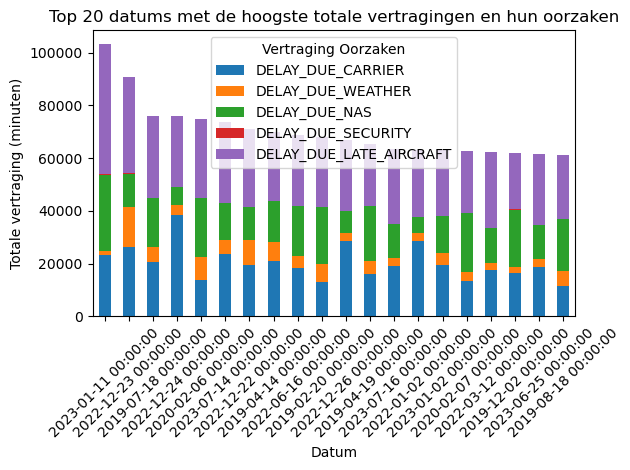

In [16]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])


total_delays = df.groupby('FL_DATE').agg({
    'DELAY_DUE_CARRIER': 'sum',
    'DELAY_DUE_WEATHER': 'sum',
    'DELAY_DUE_NAS': 'sum',
    'DELAY_DUE_SECURITY': 'sum',
    'DELAY_DUE_LATE_AIRCRAFT': 'sum'
})


total_delays['Total_Delay'] = total_delays.sum(axis=1)


top_20_dates = total_delays.nlargest(20, 'Total_Delay')


plt.figure(figsize=(14, 8))
top_20_dates[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
               'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 
               'DELAY_DUE_LATE_AIRCRAFT']].plot(kind='bar', stacked=True)

plt.title('Top 20 datums met de hoogste totale vertragingen en hun oorzaken')
plt.xlabel('Datum')
plt.ylabel('Totale vertraging (minuten)')
plt.xticks(rotation=45)
plt.legend(title='Vertraging Oorzaken')
plt.tight_layout()
plt.show()


When searching for these dates on the internet I came across the following: <br>
11 jan 2023 --> System malfunction FAA <br>
23 dec 2023 --> Christmas chaos <br>
2 feb 2020 --> Extreme weather East Coast <br>
16 jun 2022 --> post pandemic staff shortage <br>
20 feb 2019 --> Extreme cold <br>
16 jul 2023 --> extreme weather <br>
<br>
This gives insights in how these delays have occured. On the other hand, these things are hard to predict. A model can't take this into account. Extreme weather actually, mostly occure in the Northern regions during winter season.


# Airlines with most and least delays

To find out whether or not airlines have significant impact on arrival delays, this graph will be made. 

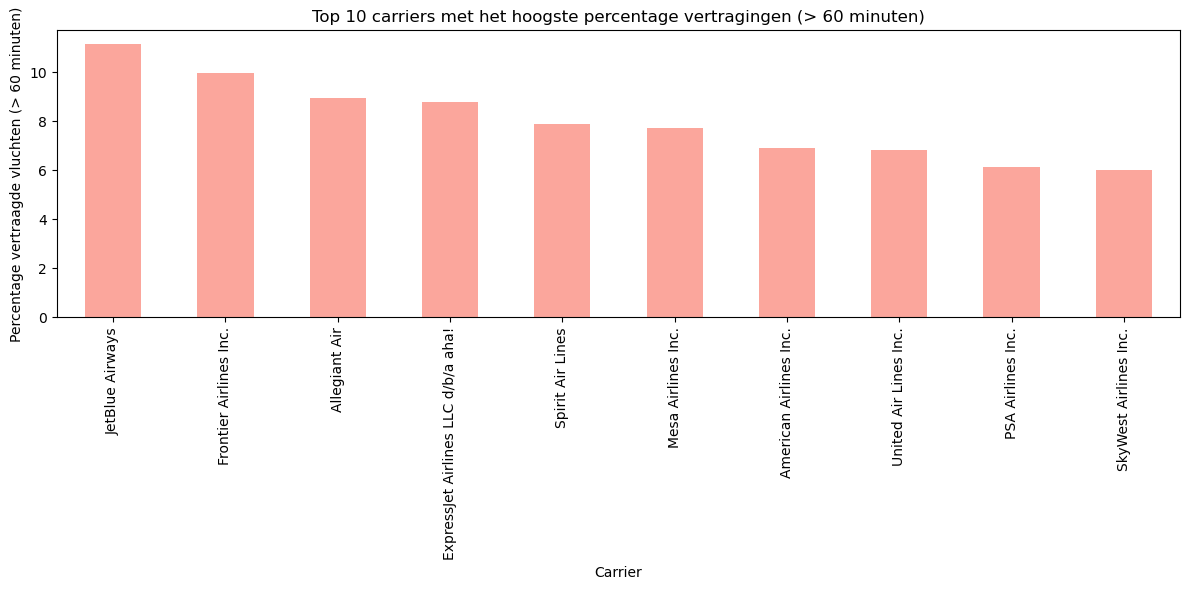

In [22]:

total_flights_per_carrier = df['AIRLINE'].value_counts()


delayed_flights_per_carrier = df[df['ARR_DELAY'] > 60]['AIRLINE'].value_counts()

percentage_delayed = (delayed_flights_per_carrier / total_flights_per_carrier) * 100


carrier_stats = pd.DataFrame({
    'Total_Flights': total_flights_per_carrier,
    'Percentage_Delayed': percentage_delayed
}).fillna(0)  


top_10_carriers = carrier_stats.nlargest(10, 'Percentage_Delayed')


plt.figure(figsize=(12, 6))
top_10_carriers['Percentage_Delayed'].plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 10 carriers met het hoogste percentage vertragingen (> 60 minuten)')
plt.xlabel('Carrier')
plt.ylabel('Percentage vertraagde vluchten (> 60 minuten)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

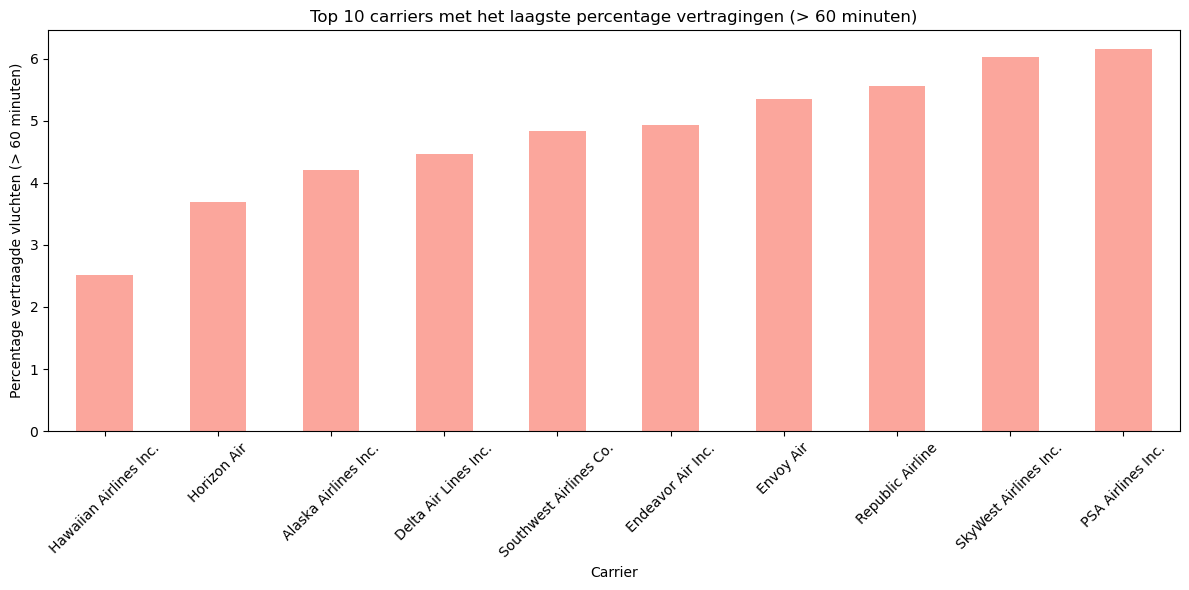

In [24]:
total_flights_per_airline = df['AIRLINE'].value_counts()


delayed_flights_per_airline = df[df['ARR_DELAY'] > 60]['AIRLINE'].value_counts()


percentage_delayed = (delayed_flights_per_airline / total_flights_per_airline) * 100


airline_stats = pd.DataFrame({
    'Total_Flights': total_flights_per_airline,
    'Percentage_Delayed': percentage_delayed
}).fillna(0)  


bottom_10_airlines = airline_stats.nsmallest(10, 'Percentage_Delayed')


plt.figure(figsize=(12, 6))
bottom_10_airlines['Percentage_Delayed'].plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 10 carriers met het laagste percentage vertragingen (> 60 minuten)')
plt.xlabel('Carrier')
plt.ylabel('Percentage vertraagde vluchten (> 60 minuten)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From these graphs, I concluded that airline is a significant feature in my dataset. If you look at the airline with the lowest percentage, you can see that Hawaiian Airlines has about 2.5% delays above 60 minutes, while JetBlue has about 10.5%. 